# Exercise 3: Multi-class Classification and Neural Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio          # For reading .mat file
import seaborn as sns; sns.set()
import random

## =========================
## Logistic Regression One-vs-All
## =========================
### Part 1: Loading and Visualizing Data

In [2]:
data = sio.loadmat('ex3data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
X = data['X']
y = data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

In [4]:
def restoreImg(data):
    '''Restore an image for properly displaying.
       Would be called in function displayData'''    
    return data.reshape(20, 20).T

def displayData(data):
    '''Display 2D data in a nice grid'''
    plt.figure(figsize=(8, 8))
    if data.shape == (len(data),):
        plt.imshow(restoreImg(data), cmap='gray')
        plt.axis('off')
    else:
        grid_rows = int(np.floor(np.sqrt(len(data))))
        grid_cols = int(np.ceil(len(data) / grid_rows))
        n = 0
        for i in range(grid_rows):
            for j in range(grid_cols):
                ax = plt.subplot2grid((grid_rows, grid_cols), (i, j))
                try:
                    ax.imshow(restoreImg(data[n, :]), cmap='gray')
                except:
                    pass
                plt.axis('off')
                n += 1
    plt.show()

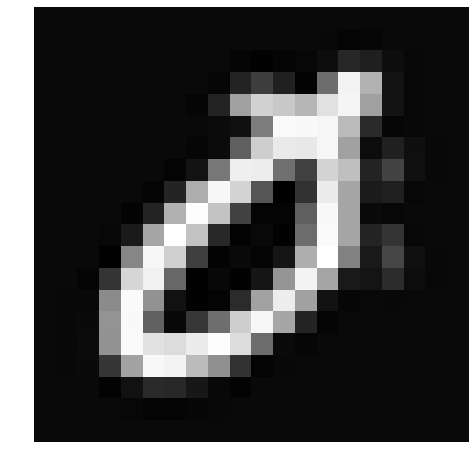

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)

rand_indices = list(range(len(X)))
random.shuffle(rand_indices)
sel = X[rand_indices[:100]]

displayData(sel[99])

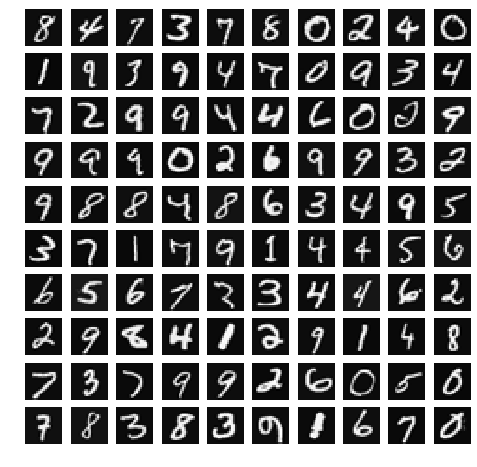

In [6]:
displayData(sel)

### Part 2a: Vectorize Logistic Regression

In [7]:
def sigmoid(z):
    '''Compute sigmoid functoon'''
    return 1 / (np.e**(-z) + 1)

def lrCostFunction(theta, X, y, lmd):
    '''Compute cost for logistic regression with regularization'''
    theta = theta.reshape(X.shape[1], 1)
    h = sigmoid(X @ theta)
    cost = (-1*y.T @ np.log(h) - (1-y).T @ np.log(1-h)) / len(y)
    reg = lmd/2/len(y) * sum(theta[1:]**2)
    return  (cost + reg).flatten()
    
def lrGradientFunction(theta, X, y, lmd):
    '''Compute gradient for logistic regression with regularization'''
    theta = theta.reshape(X.shape[1], 1)
    y = y.reshape((len(y), 1))
    h = sigmoid(X @ theta)
    grad0 = (X[:, 0].T @ (h-y) / len(y))
    grad1 = ((X[:, 1:].T @ (h-y)) / len(y) + lmd/len(y) * theta[1:]).flatten()
    return np.insert(grad1, 0, grad0)

In [8]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.c_[np.ones((5, 1)), np.arange(1, 16).reshape((5, 3), order='F') / 10]
y_t = np.array([1, 0, 1, 0, 1]) >= .5
lmd_t = 3

J = lrCostFunction(theta_t, X_t, y_t, lmd_t)
grad = lrGradientFunction(theta_t, X_t, y_t, lmd_t)

print('Cost: %f'%J)
print('Gradients:', grad)

Cost: 2.534819
Gradients: [ 0.14656137 -0.54855841  0.72472227  1.39800296]


### Part 2b: One vs All Training

In [9]:
def oneVsAll(X, y, num_labels, lmd, maxiter=50):
    '''Trains multiple logistic regression classifiers and returns all 
       the classifiers in a matrix all_theta, where the i-th row of all_theta 
       corresponds to the classifier for label i'''
    from scipy.optimize import fmin_cg
    n = X.shape[1]
    y[y==10] = 0      # Octave counts starting from 1, while Python from 0. Replacement needed.
    
    all_theta = np.zeros((num_labels, n+1))
    X = np.c_[np.ones((X.shape[0], 1)), X]
    
    for k in range(num_labels):
        initial_theta = np.zeros((n+1, 1))
        theta = fmin_cg(lrCostFunction, initial_theta, lrGradientFunction, 
                         args=(X, y==k, lmd), maxiter=maxiter)    # y==k is a key setting here
        all_theta[k, :] = theta.T
    return all_theta

In [10]:
num_labels = 10
lmd = .1
all_theta = oneVsAll(X, y, num_labels, lmd)

         Current function value: 0.009110
         Iterations: 50
         Function evaluations: 182
         Gradient evaluations: 182
         Current function value: 0.013951
         Iterations: 50
         Function evaluations: 183
         Gradient evaluations: 183
         Current function value: 0.056203
         Iterations: 50
         Function evaluations: 144
         Gradient evaluations: 144
         Current function value: 0.061953
         Iterations: 50
         Function evaluations: 139
         Gradient evaluations: 139
         Current function value: 0.037406
         Iterations: 50
         Function evaluations: 154
         Gradient evaluations: 154
         Current function value: 0.064092
         Iterations: 50
         Function evaluations: 130
         Gradient evaluations: 130
         Current function value: 0.020028
         Iterations: 50
         Function evaluations: 175
         Gradient evaluations: 175
         Current function value: 0.033008
      

### Part 3: Predict for Onve_Vs_All

In [11]:
def predictOneVsAll(all_theta, X):
    '''Predict the label for a trained one-vs-all classifier'''
    X = np.c_[np.ones((X.shape[0], 1)), X]
    p_all = X @ all_theta.T
    return p_all.argmax(axis=1)      # .argmax() returns the indices of corresponding values

In [12]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy:\n', np.mean(pred == y.reshape(len(y))) * 100)

Training Set Accuracy:
 95.14


**_As is seen, 50 iterations can't yield best result. Try a bigger maxiter value._**

In [13]:
all_theta = oneVsAll(X, y, num_labels, lmd, 500)

Optimization terminated successfully.
         Current function value: 0.008576
         Iterations: 109
         Function evaluations: 418
         Gradient evaluations: 418
Optimization terminated successfully.
         Current function value: 0.013119
         Iterations: 120
         Function evaluations: 455
         Gradient evaluations: 455
Optimization terminated successfully.
         Current function value: 0.050818
         Iterations: 280
         Function evaluations: 858
         Gradient evaluations: 858
Optimization terminated successfully.
         Current function value: 0.057614
         Iterations: 228
         Function evaluations: 675
         Gradient evaluations: 675
Optimization terminated successfully.
         Current function value: 0.033072
         Iterations: 174
         Function evaluations: 566
         Gradient evaluations: 566
Optimization terminated successfully.
         Current function value: 0.054457
         Iterations: 288
         Function ev

In [14]:
pred = predictOneVsAll(all_theta, X)
print('Training Set Accuracy:\n', np.mean(pred == y.reshape(len(y))) * 100)

Training Set Accuracy:
 96.46000000000001


## =============
## Neural Networks
## =============
### Part 1: Loading and Visualizing Data

In [15]:
data = sio.loadmat('ex3data1.mat')
X = data['X']
y = data['y']
X.shape, y.shape

((5000, 400), (5000, 1))

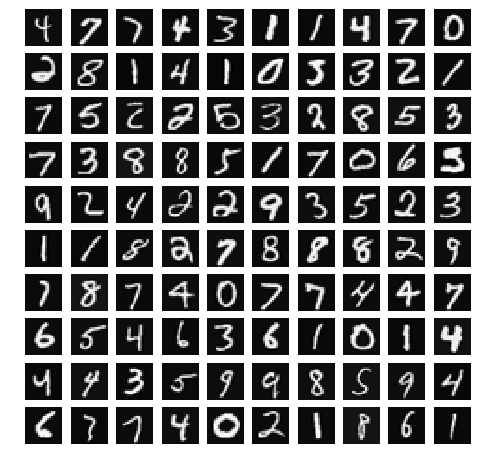

In [16]:
rand_indices = list(range(len(X)))
random.shuffle(rand_indices)
sel = X[rand_indices[:100]]

displayData(sel)

### Part 2: Loading Prameters

In [17]:
wghts = sio.loadmat('ex3weights.mat')
wghts.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [18]:
Theta1 = wghts['Theta1']
Theta2 = wghts['Theta2']
Theta1.shape, Theta2.shape

((25, 401), (10, 26))

### Part 3: Implement Predict

In [19]:
def predict(Theta1, Theta2, X):
    '''Predict the label of an input given a trained neural network'''
    X = np.c_[np.ones((len(X), 1)), X]
    
    # Layer 2
    z2 = X @ Theta1.T
    a2 = sigmoid(z2)
    a2 = np.c_[np.ones((len(a2), 1)), a2]
    
    # Output layer
    z3 = a2 @ Theta2.T
    a3 = sigmoid(z3)
    return a3.argmax(axis=1) + 1  # Plus 1 to balance the Octave/Python start number difference

In [20]:
pred = predict(Theta1, Theta2, X)
print('Training Set Accuracy: ', np.mean(pred == y.reshape(len(y))) * 100)

Training Set Accuracy:  97.52


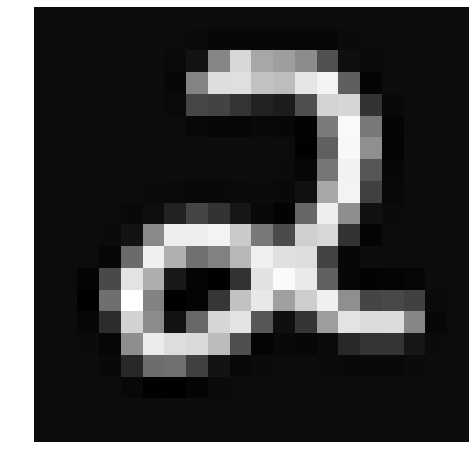

Neural Network prediction: 2 (digit 2)
Paused - Press Enter to continue, q to exit:


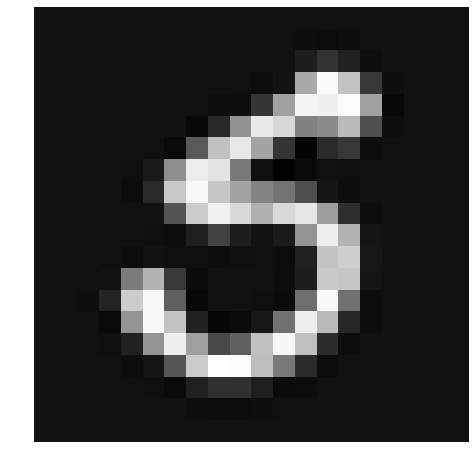

Neural Network prediction: 5 (digit 5)
Paused - Press Enter to continue, q to exit:


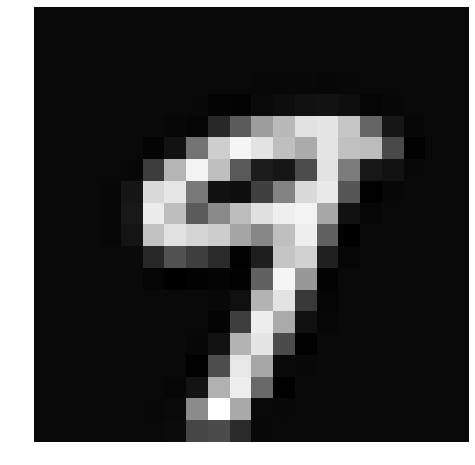

Neural Network prediction: 9 (digit 9)
Paused - Press Enter to continue, q to exit:


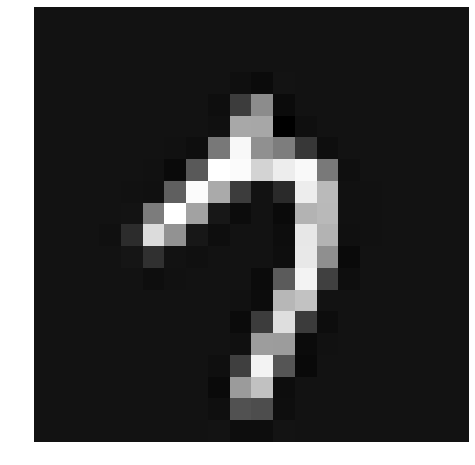

Neural Network prediction: 7 (digit 7)
Paused - Press Enter to continue, q to exit:


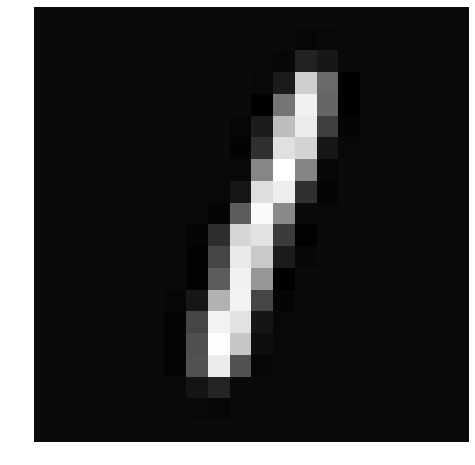

Neural Network prediction: 1 (digit 1)
Paused - Press Enter to continue, q to exit:


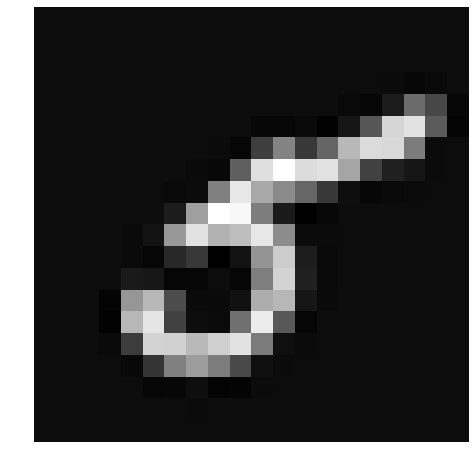

Neural Network prediction: 5 (digit 5)
Paused - Press Enter to continue, q to exit:q


In [21]:
rp = list(range(len(X)))
random.shuffle(rp)
for i in range(len(X)):
    displayData(X[rp[i]])
    pred = predict(Theta1, Theta2, X[rp[i]].reshape(1, 400))
    print('Neural Network prediction: {} (digit {})'.format(pred[0], y[rp[i]][0]))
    s = input('Paused - Press Enter to continue, q to exit:')
    if s == 'q':
        break